# 读取数据

In [1]:
import pandas as pd

insurance = pd.read_csv('insurance.csv')
print(insurance.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


## 数据信息描述

In [2]:
insurance["charges"].describe()#费用描述

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

    保险费用的分布情况

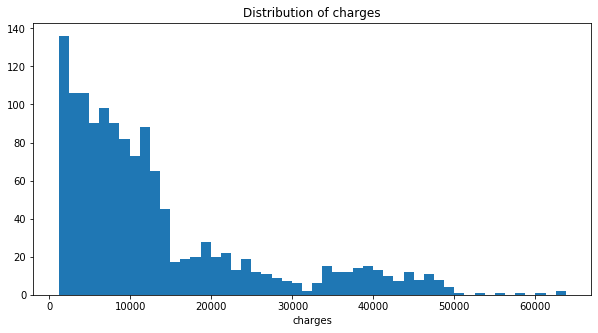

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
plt.hist(insurance["charges"],bins = 50)
plt.xlabel('charges')
plt.title('Distribution of charges')
plt.show()

    表明保险费用的分布是右偏的，其平均数大于中位数，同时我们可以知道绝大数的人每年的费用在0到15000美元之间

In [6]:
print("性别：")
print(insurance["sex"].value_counts(dropna = False))
print("吸烟者：")
print(insurance["smoker"].value_counts(dropna = False))
print("地区：")
print(insurance["region"].value_counts(dropna = False))

性别：
male      676
female    662
Name: sex, dtype: int64
吸烟者：
no     1064
yes     274
Name: smoker, dtype: int64
地区：
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


Text(0.5, 1.0, 'Distribution of region')

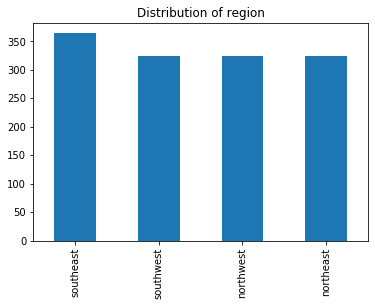

In [7]:
#地区分布图
insurance.region.value_counts().plot(kind = "bar")
plt.title('Distribution of region')

    地区分布均与

## 特征之间的关系

In [12]:
#四个数值型变量创建一个相关矩阵
insurance[["age","bmi","children","charges"]].corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


    可知费用与age,bmi,childre相关性逐渐减弱

Text(0.5, 1, 'Correlation between video num and retain')

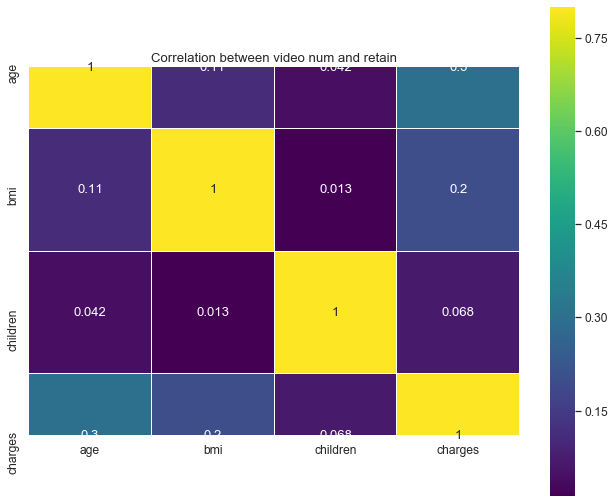

In [9]:
import seaborn as sns
#查看不同维度之间的相关性
corrMatrix = insurance[["age","bmi","children","charges"]].corr()
sns.set(font_scale=1.10)
plt.figure(figsize = (11,9))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between video num and retain')

两两变量分析：


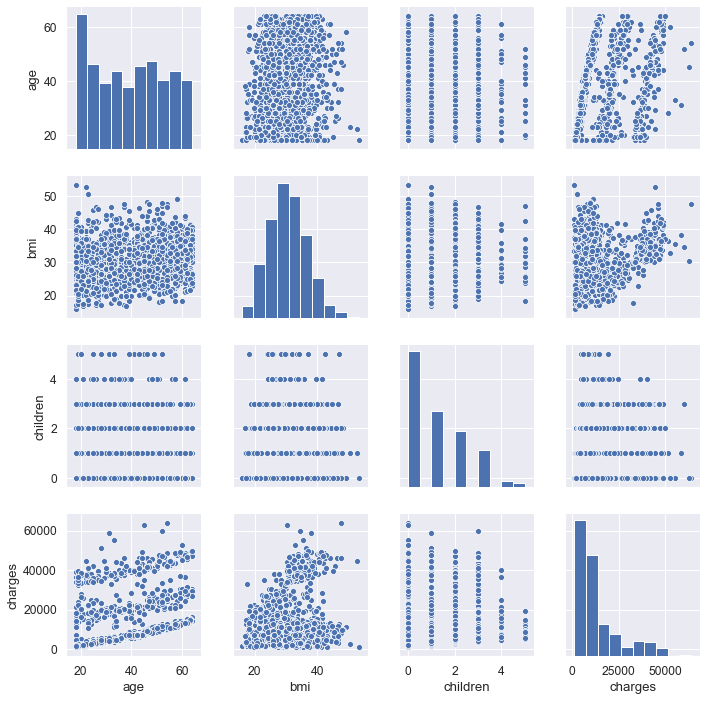

In [17]:
#两两变量分析
print('两两变量分析：')
variables = ['sex','smoker','region','age','bmi','children','charges']
sns_plot = sns.pairplot(insurance[variables])
plt.show()


## 数据预处理

    将非数值型变量转化为数值型变量

In [2]:
#将性别描述转化为数值变量
sex_onehot_df = pd.get_dummies(insurance["sex"],prefix = "sex")
#输出前10行
sex_onehot_df.head(10)

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [3]:
#将是否吸烟转化为数值变量
smoker_onehot_df = pd.get_dummies(insurance.smoker,prefix = "smoker")
smoker_onehot_df.head(10)

,smoker_no,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [4]:
#将地区转化为数值变量描述
region_onehot_df = pd.get_dummies(insurance.region,prefix = "region")

region_onehot_df.head(10)

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,0,1,0,0
8,1,0,0,0
9,0,1,0,0


In [5]:
insurance_merge = pd.concat([insurance,sex_onehot_df,smoker_onehot_df,region_onehot_df],axis = 1)
#charges为目标函数
Y = insurance["charges"]
#将东北女性非吸烟者做参照，去掉多余列，X为因变量
X = insurance_merge.drop(['charges','sex','smoker','smoker_no','region','sex_female','region_northeast'],axis = 1)
X.head(10)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
5,31,25.740,0,0,0,0,1,0
6,46,33.440,1,0,0,0,1,0
7,37,27.740,3,0,0,1,0,0
8,37,29.830,2,1,0,0,0,0
9,60,25.840,0,0,0,1,0,0


# 构建线性回归模型

In [50]:
#将数据集划分为训练集和测试集
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=42)
print('训练集数据大小：',len(train_X))
print('测试集数据大小：',len(test_X))

训练集数据大小： 936
测试集数据大小： 402


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()
#测试模型
lr.fit(train_X,train_Y)
#查看模型相关系数
pd.Series(data = lr.coef_,index = X.columns)#coef_为相关系数（w1,w2……,wn）

age                   261.296924
bmi                   348.906915
children              424.119128
sex_male              104.811823
smoker_yes          23628.367222
region_northwest     -486.934610
region_southeast     -970.968839
region_southwest     -926.322908
dtype: float64

### 回归模型评估

In [53]:
pred_y_test = lr.predict(test_X)#训练集模型预测

pred_y_train = lr.predict(train_X)#测试集模型预测

print("训练集R^2: ", metrics.r2_score(test_Y,pred_y_test))
print("测试集R^2: " ,metrics.r2_score(train_Y,pred_y_train))

训练集R^2:  0.7696118054369012
测试集R^2:  0.742398009060026


# 提高模型性能

    添加非线性关系，可以添加一个高阶项到回归模型中，还有吸烟与肥胖对医疗费用的影响的相关性

In [6]:
X['age^2'] = X['age']**2#非线性关系，年龄的立方项加入
#将数值型变量转化为二进制指标
bmi_30 = (X.bmi>=30)*1
X['bmi_30'] = bmi_30

In [7]:
#假定吸烟与肥胖存在共同影响，即相互作用
X['bmi30_smoker'] = X['bmi_30']*X['smoker_yes']
X.head(5)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age^2,bmi_30,bmi30_smoker
0,19,27.900,0,0,1,0,0,1,361,0,0
1,18,33.770,1,1,0,0,1,0,324,1,0
2,28,33.000,3,1,0,0,1,0,784,1,0
3,33,22.705,0,1,0,1,0,0,1089,0,0
4,32,28.880,0,1,0,1,0,0,1024,0,0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#划分数据集和测试集进行模型训练
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(train_x,train_y)
#输出自变量对应的相关系数
print(pd.Series(data = model.coef_,index = X.columns))

#回归效果评估
pred_y_train1 = model.predict(train_x)
pred_y_test1 = model.predict(test_x)

print("训练集R^2:",metrics.r2_score(train_y,pred_y_train1))
print("测试集R^2:",metrics.r2_score(test_y,pred_y_test1))


age                    -3.287823
bmi                   109.134870
children              620.235705
sex_male             -419.333392
smoker_yes          13379.331519
region_northwest     -375.703778
region_southeast     -781.023678
region_southwest    -1297.679314
age^2                   3.401478
bmi_30               -810.738745
bmi30_smoker        19957.636748
dtype: float64
训练集R^2: 0.8625764441079369
测试集R^2: 0.8746450437815864


+ 模型的拟合效果变得更高，说明肥胖和吸烟之间存在相关性，且年龄的立方项也有效果

    是否有孩子与年龄之间的是否有相关性

In [58]:
child_y = (X.children>0)*1
X['child_y'] = child_y
X['child_age'] = X['age']*X['child_y']
X['child_age'].head(5)

0     0
1    18
2    28
3     0
4     0
Name: child_age, dtype: int64

In [59]:
X.head(5)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age^3,bmi_30,bmi30_smoker,child_y,child_age
0,19,27.900,0,0,1,0,0,1,6859,0,0,0,0
1,18,33.770,1,1,0,0,1,0,5832,1,0,1,18
2,28,33.000,3,1,0,0,1,0,21952,1,0,1,28
3,33,22.705,0,1,0,1,0,0,35937,0,0,0,0
4,32,28.880,0,1,0,1,0,0,32768,0,0,0,0


In [60]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(train_x,train_y)
#输出自变量对应的相关系数
print(pd.Series(data = model.coef_,index = X.columns))

#回归效果评估
pred_y_train1 = model.predict(train_x)
pred_y_test1 = model.predict(test_x)

print("训练集R^2:",metrics.r2_score(train_y,pred_y_train1))
print("测试集R^2:",metrics.r2_score(test_y,pred_y_test1))

age                   111.582682
bmi                   108.022360
children              451.315917
sex_male             -408.048464
smoker_yes          13382.987875
region_northwest     -403.354071
region_southeast     -792.430267
region_southwest    -1293.834640
age^3                   0.029876
bmi_30               -806.233205
bmi30_smoker        19939.623846
child_y               278.721939
child_age               6.828409
dtype: float64
训练集R^2: 0.8627373923784079
测试集R^2: 0.8747772090744861


    模型的模拟效果没有过多改变，可知家庭是否有孩子与年龄数对目标值无过大影响

# 岭回归

In [86]:
x1 = X.drop(['child_y','child_age'],axis = 1)
train_x,test_x,train_y,test_y = train_test_split(x1,Y,test_size=0.3, random_state=42)
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.5)
reg.fit(train_x,train_y)

pred_y_train1 = reg.predict(train_x)
pred_y_test1 = reg.predict(test_x)

print(pd.Series(data = reg.coef_,index = x1.columns))
print(reg.intercept_)

print("训练集R^2:",metrics.r2_score(train_y,pred_y_train1))
print("测试集R^2:",metrics.r2_score(test_y,pred_y_test1))

age                   125.182613
bmi                   108.599367
children              616.454085
sex_male             -414.147197
smoker_yes          13379.638992
region_northwest     -373.165554
region_southeast     -773.296363
region_southwest    -1290.497930
age^3                   0.027894
bmi_30               -797.210277
bmi30_smoker        19945.766343
dtype: float64
-1557.6961232820431
训练集R^2: 0.8625444757148537
测试集R^2: 0.8744591029699722


    进行正则化后的模型效果并没有过大改变